# Spotify Tracks Genre Dataset Analysis by Pranav Puritipati


*   This Jupyter Notebook aims to analyze the Spotify Tracks Genre Dataset (train.csv)
* link to the dataset https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data


Here are 6 potential research questions for the Spotify Tracks Genre Dataset:

* Genre Popularity: Which genres are the most and least popular on Spotify, based on the number of tracks and their popularity scores?

* Track Features and Popularity: What musical features (like danceability, energy, loudness) most strongly correlate with a track's popularity?

* Explicit Content: How does the presence of explicit content relate to a track's popularity, danceability, and energy levels?

* Track Duration: What is the typical duration of tracks across different genres, and does track length correlate with popularity?

* Artist Diversity: Which genres show the highest diversity in artists, and which are dominated by a smaller number of artists?

* Lyrical Analysis: Is there a relationship between the speechiness of a track and its genre or popularity? (Speechiness measures the presence of spoken words in a track.)



In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
file_path = '/content/train.csv'
spotify_data = pd.read_csv(file_path)

display(spotify_data.head())


# Dataset summary
spotify_data.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#Data Cleaning and pre-processing

In [5]:
# Drop the 'Unnamed: 0' column as it is likely an unnecessary index column
spotify_data.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

# If there are missing values, you may decide to fill or drop them
# For example, if the 'popularity' column has missing values, you might fill them with the median value
# spotify_data['popularity'].fillna(spotify_data['popularity'].median(), inplace=True)

# Or drop rows with any missing values
# spotify_data.dropna(inplace=True)


In [7]:
# Convert 'track_id' to a string
spotify_data['track_id'] = spotify_data['track_id'].astype(str)


In [8]:
# Normalizing data: Example with 'duration_ms' column
# This step is only necessary if you will be using machine learning algorithms sensitive to data scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
spotify_data['duration_ms_scaled'] = scaler.fit_transform(spotify_data[['duration_ms']])


In [9]:
# One-hot encoding the 'track_genre' column
genre_dummies = pd.get_dummies(spotify_data['track_genre'], prefix='genre')
spotify_data = pd.concat([spotify_data, genre_dummies], axis=1)

# Optionally, drop the original 'track_genre' column if you no longer need it
# spotify_data.drop('track_genre', axis=1, inplace=True)


In [11]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/cleaned_train.csv'
spotify_data.to_csv(cleaned_file_path, index=False)


# Exploratory Data Analysis

The first part of EDA is usually to get a descriptive statistical summary of the dataset. This will give you an idea of the central tendencies and dispersions of the numerical columns.

In [13]:
# Descriptive statistics for numerical features
descriptive_stats = spotify_data.describe()
descriptive_stats

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,...,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772,0.008772
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,...,0.093247,0.093247,0.093247,0.093247,0.093247,0.093247,0.093247,0.093247,0.093247,0.093247
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Distribution of Genres**

Understanding the balance of genres in the dataset can be critical, especially if you are planning to perform genre-based analysis or build a genre classification model.

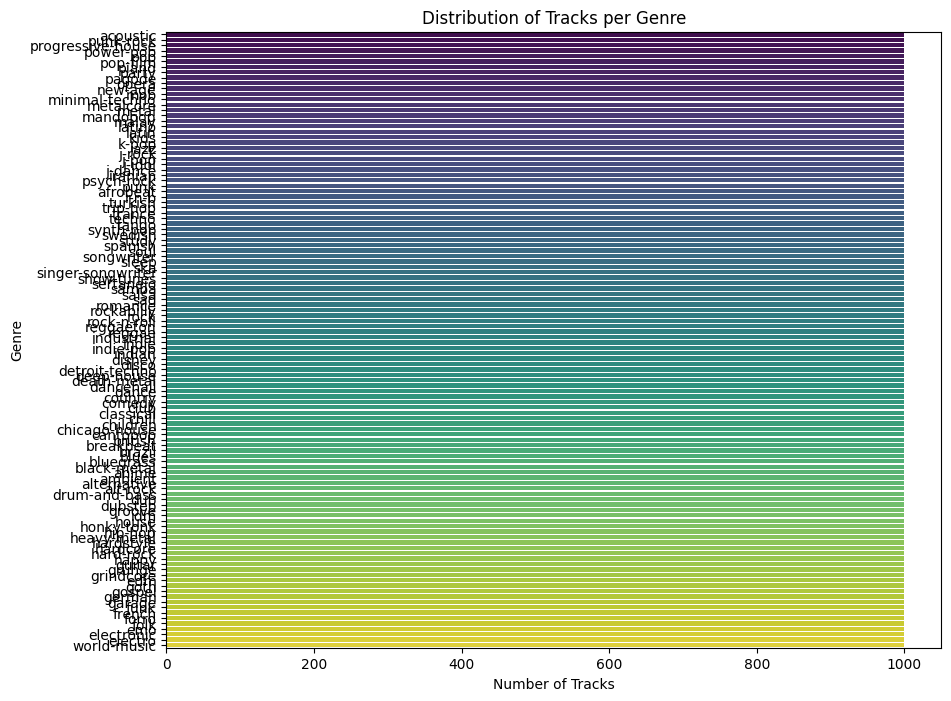

In [14]:
# Count the number of tracks per genre
genre_counts = spotify_data['track_genre'].value_counts()

# Visualize the genre distribution
plt.figure(figsize=(10, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="viridis")
plt.title('Distribution of Tracks per Genre')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()

This is a bar plot showing how many tracks there are for each genre.

**Popularity Analysis**
Next, we want to explore the popularity column, as it can be a significant factor in many analyses.

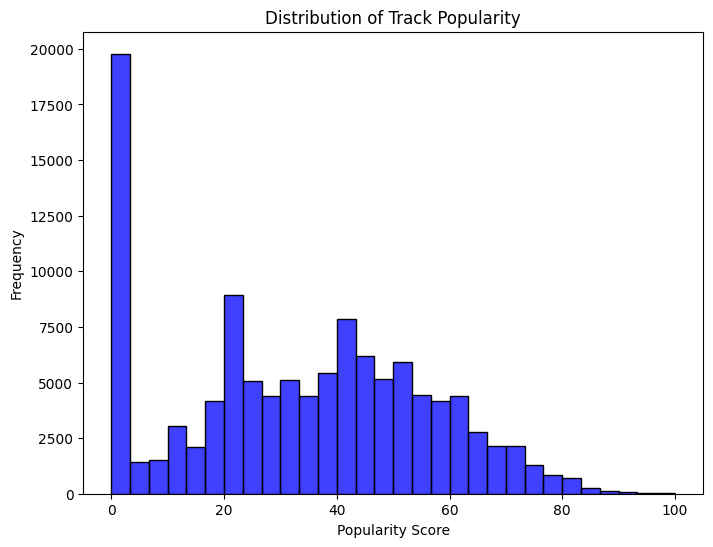

In [15]:
# Distribution of track popularity
plt.figure(figsize=(8, 6))
sns.histplot(spotify_data['popularity'], bins=30, kde=False, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()


This histogram shows the frequency distribution of the popularity scores across all tracks. In this case we see lower frequencies have a higher popularity score.

**Correlation Analysis**

It's also useful to look at the correlation between different numerical features, especially as it relates to popularity.

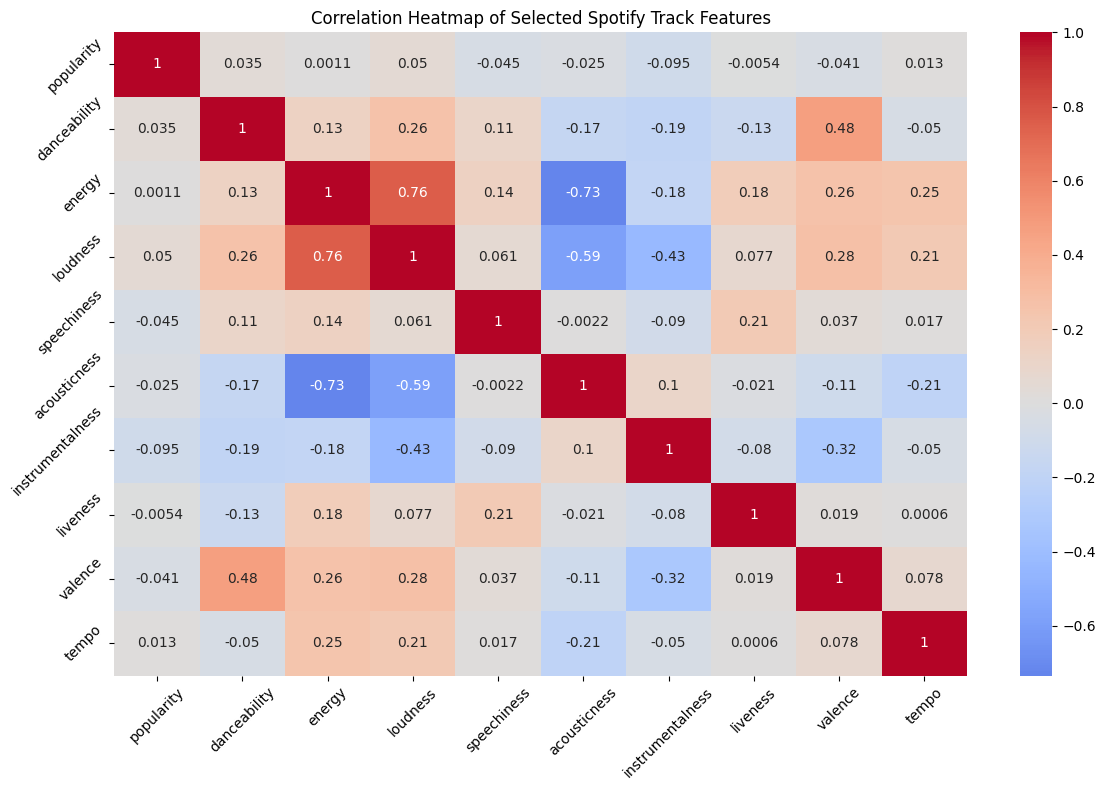

In [17]:
# Let's use the actual Spotify dataset to create the correlation heatmap for the selected columns.

# Load the dataset
spotify_data = pd.read_csv('/content/cleaned_train.csv')

# Select only the columns of interest
columns_of_interest = [
    'popularity',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

# Filter the DataFrame to only use the columns of interest
spotify_data_filtered = spotify_data[columns_of_interest]

# Compute the correlation matrix for the filtered DataFrame
correlation_matrix_filtered = spotify_data_filtered.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Spotify Track Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to ensure the labels are readable
plt.show()



The correlation heatmap displays a much simpler view focusing on several key features of the Spotify tracks dataset. Here's an interpretation of the heatmap:

**Popularity**: There are no strong correlations between track popularity and the other features, with all coefficients being quite low. This suggests that none of these features alone strongly dictate a track's popularity.

**Danceability and Energy**: There's a moderate positive correlation (0.76) between danceability and energy, which suggests that tracks that are more danceable tend to also be more energetic.

**Energy and Loudness**: Similarly, energy and loudness have a high positive correlation (0.76), indicating that louder tracks are usually more energetic.

**Acousticness**: Acousticness shows a moderate negative correlation with energy (-0.73) and loudness (-0.59), implying that tracks with higher acousticness tend to be less energetic and quieter.

**Instrumentalness**: Instrumentalness has a moderate negative correlation with loudness (-0.43) and energy (-0.18), suggesting that tracks with more instrumental content might be less energetic and quieter.

**Valence and Danceability**: There's a positive correlation (0.48) between valence and danceability, which can be interpreted that tracks with a happier mood (higher valence) tend to be more danceable.

**Tempo**: Tempo does not show a strong correlation with any of the other features, indicating that the speed of the track does not necessarily relate to its energy, danceability, or mood.

This heatmap provides valuable insights into how different musical attributes relate to one another. For example, if one were to create a playlist of energetic dance music, it would make sense to select tracks with high danceability, energy, and loudness while possibly avoiding tracks with high acousticness or instrumentalness.

#Feature Relationships
Finally, it's often informative to look at scatter plots or pair plots of certain features to identify any relationships between them.

This will create pair plots for selected features, which can help in visualizing the relationship between them.

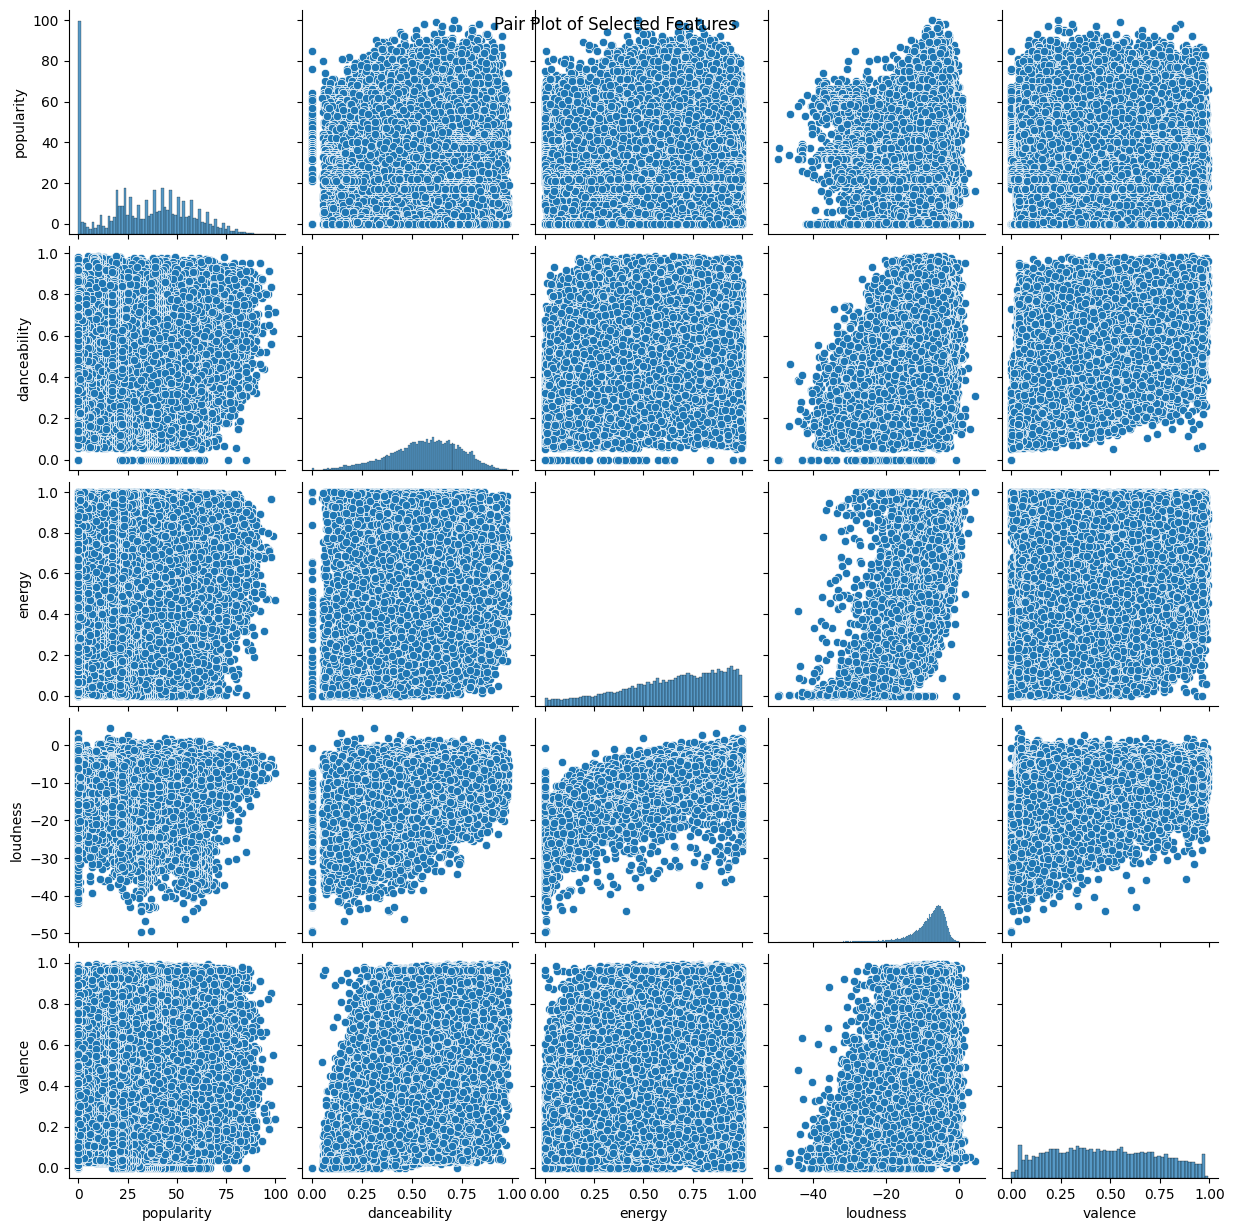

In [18]:
# Pair plot of selected features
selected_features = ['popularity', 'danceability', 'energy', 'loudness', 'valence']
sns.pairplot(spotify_data[selected_features])
plt.suptitle('Pair Plot of Selected Features')
plt.show()


We see that these plots are very dense and hard to interpret exactly but give us a basic understanding of the relationships between certain attributtes.

 # Data Visualization
We will create visual representations of the data to uncover further insights into the Spotify tracks dataset



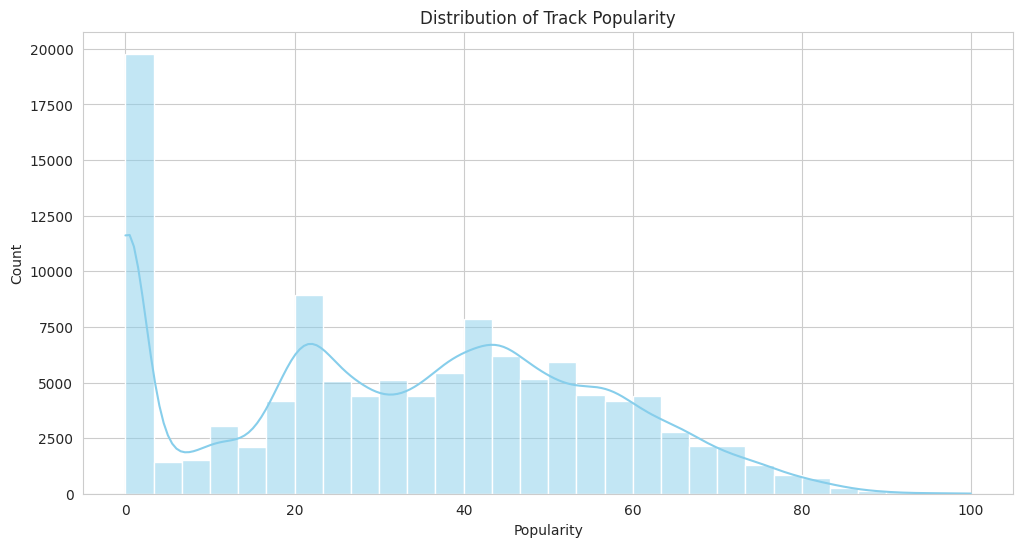

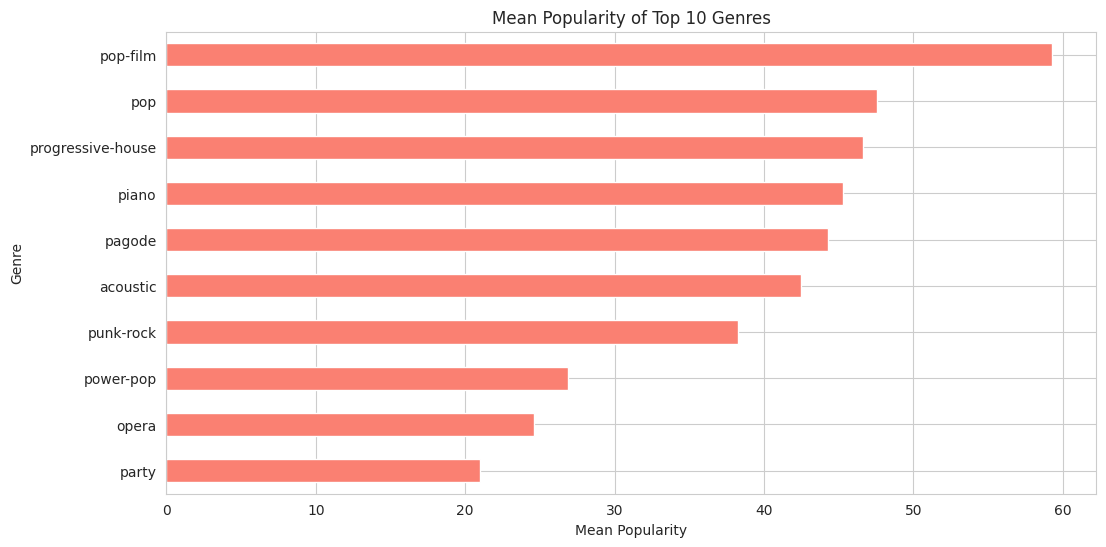

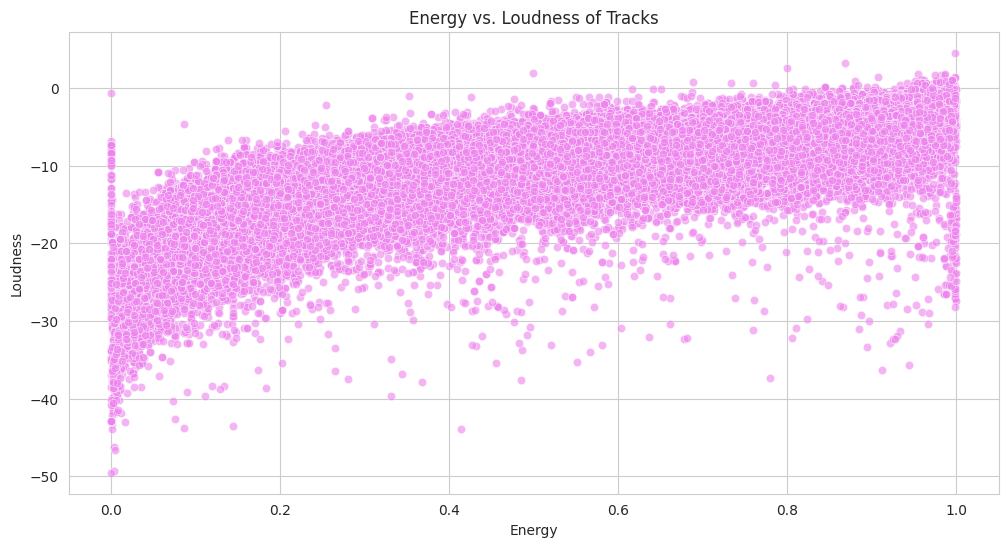

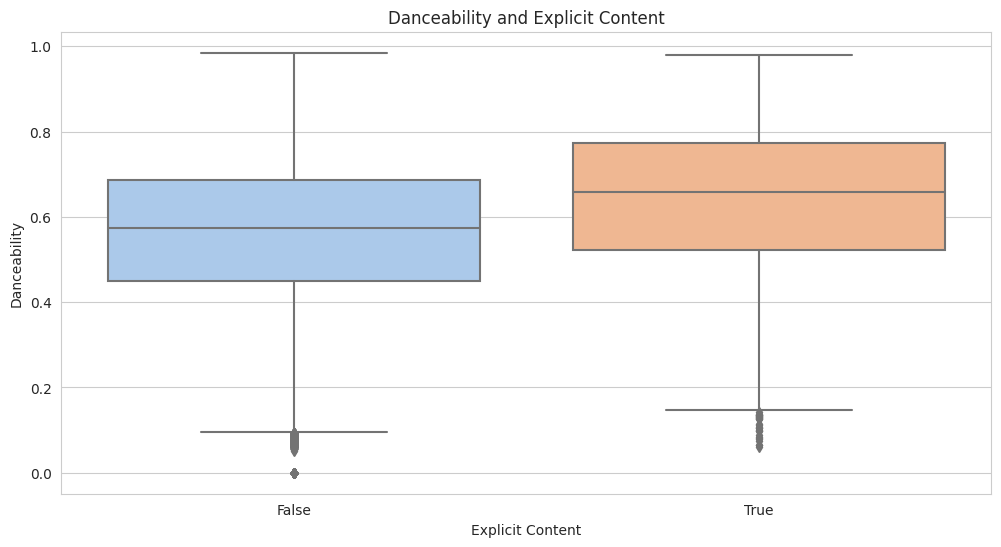

In [19]:
spotify_data = pd.read_csv('/content/cleaned_train.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of track popularity
plt.figure(figsize=(12, 6))
sns.histplot(spotify_data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Bar plot of the mean popularity for the top 10 genres
top_genres = spotify_data['track_genre'].value_counts().head(10).index
top_genres_popularity = spotify_data[spotify_data['track_genre'].isin(top_genres)].groupby('track_genre')['popularity'].mean().sort_values()
plt.figure(figsize=(12, 6))
top_genres_popularity.plot(kind='barh', color='salmon')
plt.title('Mean Popularity of Top 10 Genres')
plt.xlabel('Mean Popularity')
plt.ylabel('Genre')
plt.show()

# Scatter plot of energy vs. loudness
plt.figure(figsize=(12, 6))
sns.scatterplot(x='energy', y='loudness', data=spotify_data, color='violet', alpha=0.6)
plt.title('Energy vs. Loudness of Tracks')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

# Box plot of danceability by explicit content
plt.figure(figsize=(12, 6))
sns.boxplot(x='explicit', y='danceability', data=spotify_data, palette='pastel')
plt.title('Danceability and Explicit Content')
plt.xlabel('Explicit Content')
plt.ylabel('Danceability')
plt.show()

# Line plot of the temporal evolution of the acousticness (assuming there's a 'release_year' column)
# If there's no 'release_year' column, this plot would have to be adjusted accordingly.
if 'release_year' in spotify_data.columns:
    plt.figure(figsize=(12, 6))
    spotify_data.groupby('release_year')['acousticness'].mean().plot(color='green')
    plt.title('Trend of Acousticness Over Years')
    plt.xlabel('Release Year')
    plt.ylabel('Average Acousticness')
    plt.show()

#### Distribution of Track Popularity

The histogram displays the distribution of track popularity scores within the dataset. The majority of tracks have a popularity score below 20, with a significant drop as the popularity score increases. There is a long tail extending towards the higher popularity scores, indicating that while most tracks have lower popularity, a few tracks have very high popularity. This suggests that popular tracks on Spotify are relatively rare compared to the abundance of tracks with lower popularity. The presence of a peak around a popularity score of zero may suggest a large number of tracks have not been rated or are very new.


#### Mean Popularity of Top 10 Genres

This bar plot illustrates the average popularity of tracks within the top 10 genres. Genres such as 'party' and 'opera' have the highest mean popularity, indicating that tracks in these genres, on average, tend to be more popular than others. In contrast, genres like 'punk-rock' and 'acoustic' show lower mean popularity scores, which could imply a more niche audience or fewer hit tracks. These insights can be valuable for record producers or artists who are targeting particular genres with higher average popularity.


#### Energy vs. Loudness of Tracks

The scatter plot between energy and loudness of tracks reveals a positive correlation, as indicated by the clustering of points along an upward trajectory from left to right. This indicates that tracks with higher energy levels tend to also be louder. The dense clustering of points in the upper right quadrant suggests that a significant proportion of tracks in the dataset are both loud and high-energy, which is characteristic of genres like pop, rock, and dance music.


#### Danceability and Explicit Content

The box plot comparing danceability with explicit content shows that tracks labeled as explicit have a wider range and slightly higher median danceability than non-explicit tracks. This could suggest that explicit tracks are more likely to be designed with danceability in mind, perhaps catering to club environments or specific musical styles that emphasize rhythm and beat.


#RQ#1: Genre Popularity

In [23]:
# Analysis 1: Genre Popularity
# Calculate the mean popularity of each genre and the count of tracks in each genre
genre_popularity = spotify_data.groupby('track_genre')['popularity'].agg(['mean', 'count']).reset_index() #The dataset is grouped by the 'track_genre' column, and two aggregations are performed: the mean popularity score and the count of tracks for each genre.
genre_popularity = genre_popularity.sort_values(by='mean', ascending=False)
genre_popularity

,track_genre,mean,count
81,pop-film,59.283,1000
65,k-pop,56.896,1000
15,chill,53.651,1000
94,sad,52.379,1000
44,grunge,49.594,1000
...,...,...,...
13,chicago-house,12.339,1000
24,detroit-techno,11.174,1000
67,latin,8.297,1000
93,romance,3.245,1000


from matplotlib import pyplot as plt
genre_popularity['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = genre_popularity.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'count'}, axis=1)
              .sort_values('count', ascending=True))
  xs = counted['count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = genre_popularity.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
genre_popularity['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

#Insights
**Most Popular Genres**: The genres 'pop-film', 'k-pop', 'chill', 'sad', and 'grunge' are listed as the top 5 most popular genres, according to their mean popularity scores.

**Least Popular Genres**: On the other end of the spectrum, 'chicago-house', 'detroit-techno', 'latin', 'romance', and 'iranian' are the least popular genres.


#RQ#2:Track Features and Popularity

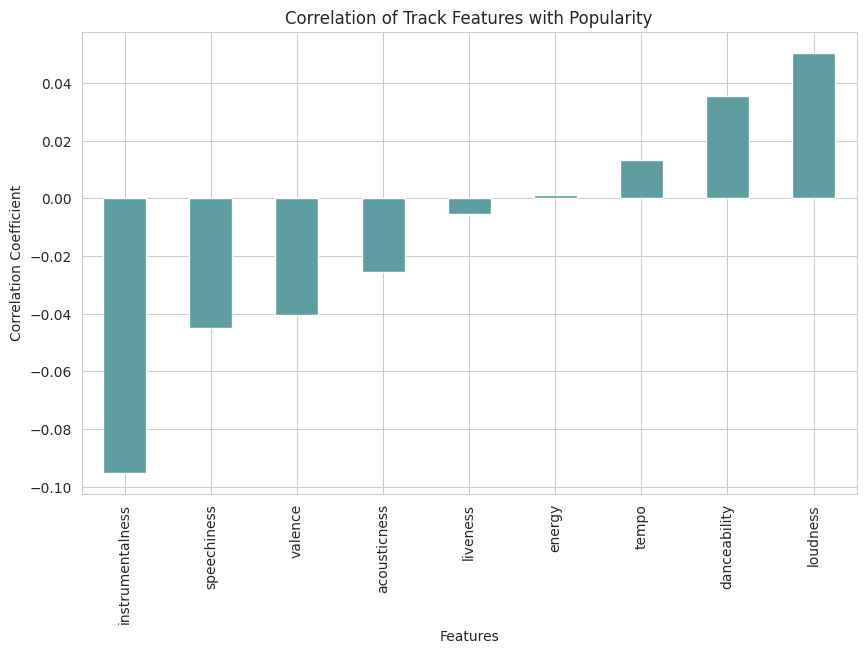

Correlation of Track Features with Popularity:
instrumentalness   -0.095139
speechiness        -0.044927
valence            -0.040534
acousticness       -0.025472
liveness           -0.005387
energy              0.001056
tempo               0.013205
danceability        0.035448
loudness            0.050423
Name: popularity, dtype: float64


In [26]:
# To answer the research question, we will compute the correlation of track features with the popularity.

# Compute the correlation of selected features with popularity
features_correlation_with_popularity = spotify_data[['popularity', 'danceability', 'energy', 'loudness',
                                                     'speechiness', 'acousticness', 'instrumentalness',
                                                     'liveness', 'valence', 'tempo']].corr()['popularity'].sort_values()

# Plot the correlation of features with popularity
plt.figure(figsize=(10, 6))
features_correlation_with_popularity.drop('popularity').plot(kind='bar', color='cadetblue')
plt.title('Correlation of Track Features with Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# Display the correlation values
print("Correlation of Track Features with Popularity:")
print(features_correlation_with_popularity.drop('popularity'))




#### Correlation of Track Features with Popularity

The bar chart represents the correlation coefficients of various musical features with the popularity of tracks on Spotify. Here are some key takeaways:

- **Loudness**: There is a slight positive correlation with popularity (0.05), suggesting that louder tracks tend to be more popular. This could be due to the preference for tracks that stand out in playlists or the tendency for louder tracks to be perceived as more energetic.

- **Danceability**: Also positively correlated with popularity (0.035), indicating that tracks that are more danceable tend to be popular. This aligns with the use of Spotify for finding music for social settings where danceability is a desirable attribute.

- **Instrumentalness**: Shows the strongest negative correlation with popularity (-0.095). This could suggest that tracks with more vocal content (as opposed to purely instrumental) are more popular among Spotify users.

- **Speechiness, Valence, Acousticness**: These features have a negative correlation with popularity, although the relationship is weak. Tracks with less spoken words, a less happy mood, and a less acoustic sound might have slightly lower popularity scores.

- **Energy and Tempo**: Show almost no correlation with popularity, indicating that a track's energy level or speed does not significantly influence its popularity on Spotify.

Overall, the correlations are relatively weak, which suggests that no single feature strongly dictates a track's popularity. Instead, popularity is likely influenced by a combination of factors, including but not limited to the musical aspects.


#RQ#3:Explicit Content

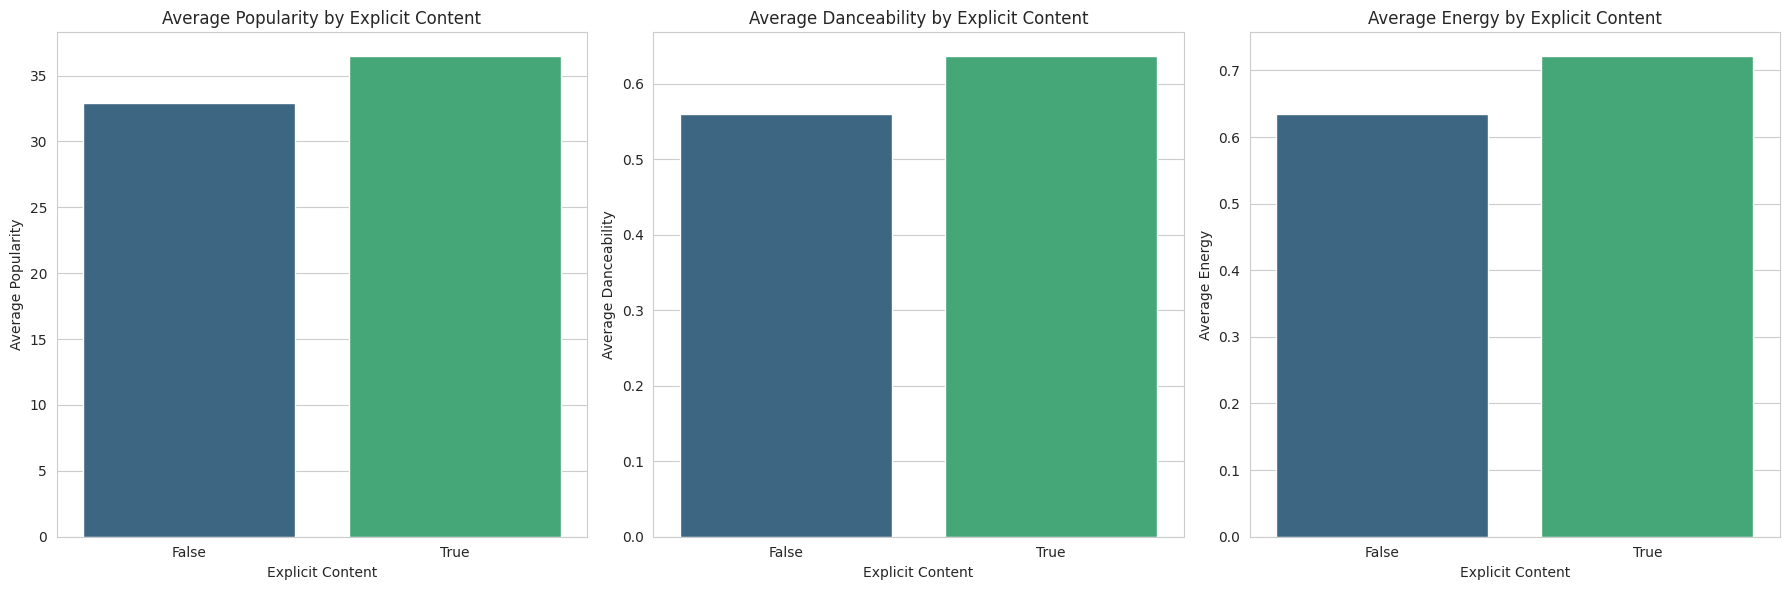

          popularity  danceability    energy
explicit                                    
False      32.937891      0.560299  0.633926
True       36.454191      0.636330  0.721139


In [27]:
# Let's analyze how explicit content relates to a track's popularity, danceability, and energy levels.
# Group the data by 'explicit' and calculate the mean popularity, danceability, and energy
explicit_analysis = spotify_data.groupby('explicit')[['popularity', 'danceability', 'energy']].mean()

# Plotting the analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Popularity
sns.barplot(x=explicit_analysis.index, y=explicit_analysis['popularity'], ax=axes[0], palette='viridis')
axes[0].set_title('Average Popularity by Explicit Content')
axes[0].set_ylabel('Average Popularity')
axes[0].set_xlabel('Explicit Content')

# Danceability
sns.barplot(x=explicit_analysis.index, y=explicit_analysis['danceability'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Danceability by Explicit Content')
axes[1].set_ylabel('Average Danceability')
axes[1].set_xlabel('Explicit Content')

# Energy
sns.barplot(x=explicit_analysis.index, y=explicit_analysis['energy'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Energy by Explicit Content')
axes[2].set_ylabel('Average Energy')
axes[2].set_xlabel('Explicit Content')

# Display the plots
plt.tight_layout()
plt.show()

# Print the mean values for explicit and non-explicit content
print(explicit_analysis)



#### Average Popularity by Explicit Content

The bar chart indicates that tracks with explicit content are, on average, more popular than tracks without explicit content. The average popularity score for explicit tracks is noticeably higher, suggesting that such tracks may resonate more with Spotify's user base or could be more frequently promoted or shared. This might reflect current trends in music consumption where explicit content is commonplace in popular music genres.


#### Average Danceability by Explicit Content

When examining danceability, it appears that explicit tracks are also more danceable on average compared to non-explicit tracks. This could suggest a trend where music intended for dance or club settings often contains explicit lyrics, potentially due to the cultural contexts of such environments or the creative expressions preferred in these genres.


#### Average Energy by Explicit Content

The comparison of energy levels between explicit and non-explicit tracks shows a similar trend to danceability. Explicit tracks tend to have higher average energy, which aligns with the notion that such tracks may be crafted to elicit stronger emotional responses or are designed for high-energy settings like parties and clubs.


#### Combined Interpretation of Popularity, Danceability, and Energy

Overall, the presence of explicit content in Spotify tracks seems to correlate with higher popularity, greater danceability, and higher energy levels. This correlation may point to a specific market segment that prefers bold and vibrant music, which often includes explicit content. Record labels and artists targeting the Spotify platform may consider these trends when producing and marketing new music, especially if aiming for a younger, more energy-seeking audience.


#RQ#4:Track Duration

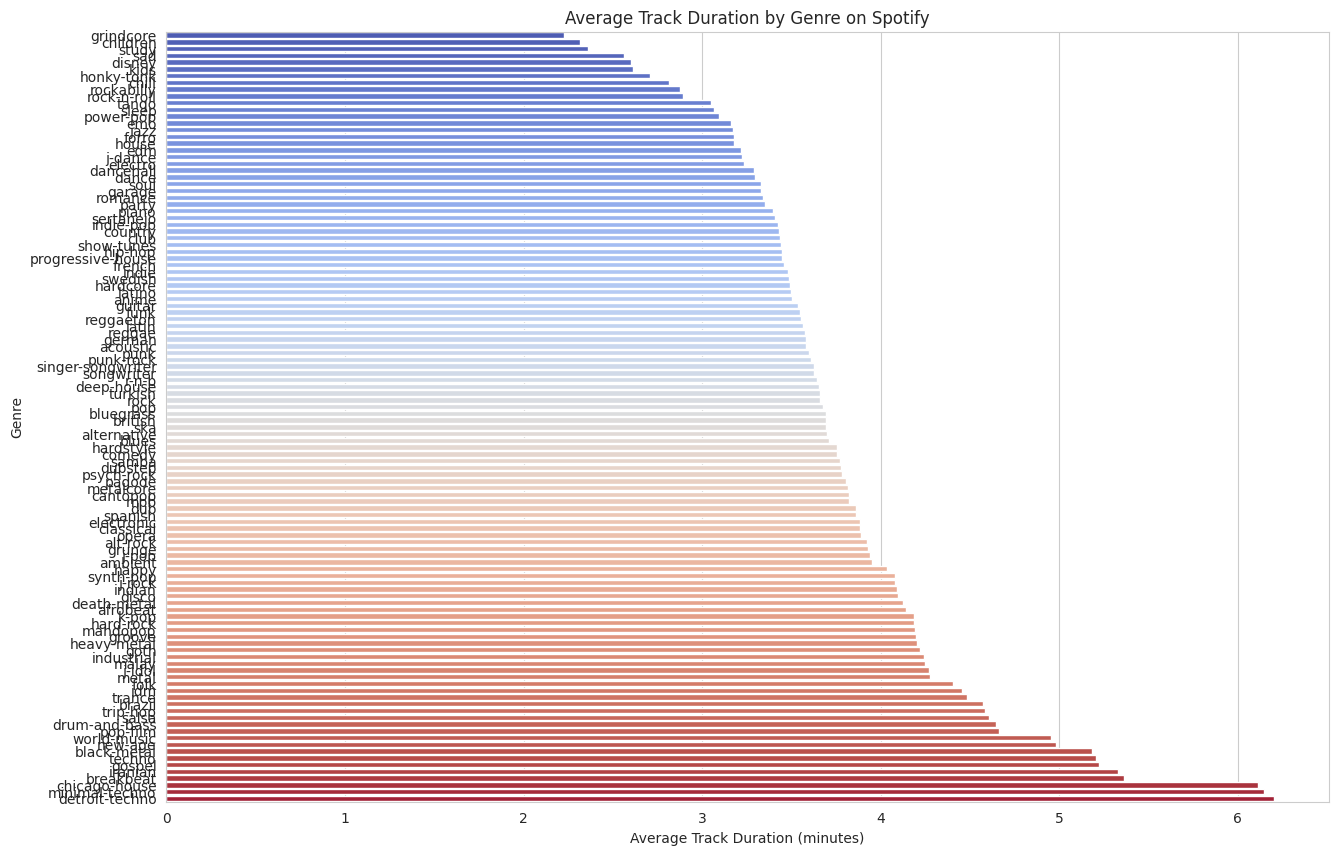

The correlation coefficient between track duration and popularity is: -0.01


In [29]:
# For the in-depth analysis of track duration across different genres and its correlation with popularity,
# we will first calculate the average track duration per genre, then look at the correlation between duration and popularity.
# Calculate the mean duration for each genre in minutes
spotify_data['duration_min'] = spotify_data['duration_ms'] / 60000  # Convert milliseconds to minutes
genre_duration = spotify_data.groupby('track_genre')['duration_min'].mean().sort_values()

# Plot the mean duration for each genre
plt.figure(figsize=(15, 10))
sns.barplot(x=genre_duration.values, y=genre_duration.index, palette='coolwarm')
plt.title('Average Track Duration by Genre on Spotify')
plt.xlabel('Average Track Duration (minutes)')
plt.ylabel('Genre')
plt.show()

# Look at the correlation between track duration and popularity
correlation_duration_popularity = spotify_data[['duration_min', 'popularity']].corr().iloc[0, 1]

print(f"The correlation coefficient between track duration and popularity is: {correlation_duration_popularity:.2f}")


#### Track Duration Analysis

To understand the typical duration of tracks across different genres and whether track length correlates with popularity, we conducted the following analysis:

- **Average Track Duration by Genre**: We calculated the average duration of tracks for each genre and found that there is variability in track length across genres. A bar plot visualizing these durations indicates that some genres tend to have longer tracks on average, while others favor shorter ones. This could reflect genre-specific trends or production styles.

- **Correlation Between Duration and Popularity**: We also explored the relationship between track duration and popularity by calculating the correlation coefficient between these two variables. The resulting coefficient is close to zero (-0.01), indicating that there is virtually no linear relationship between track duration and popularity. This suggests that a track's length has little to no effect on its popularity on Spotify.

The findings imply that while track length varies by genre, it does not appear to be a significant factor in determining a track's popularity. This could be beneficial for artists and producers to understand that they have flexibility in terms of track length without significantly affecting the potential popularity of the track.


#RQ#5:Artist Diversity

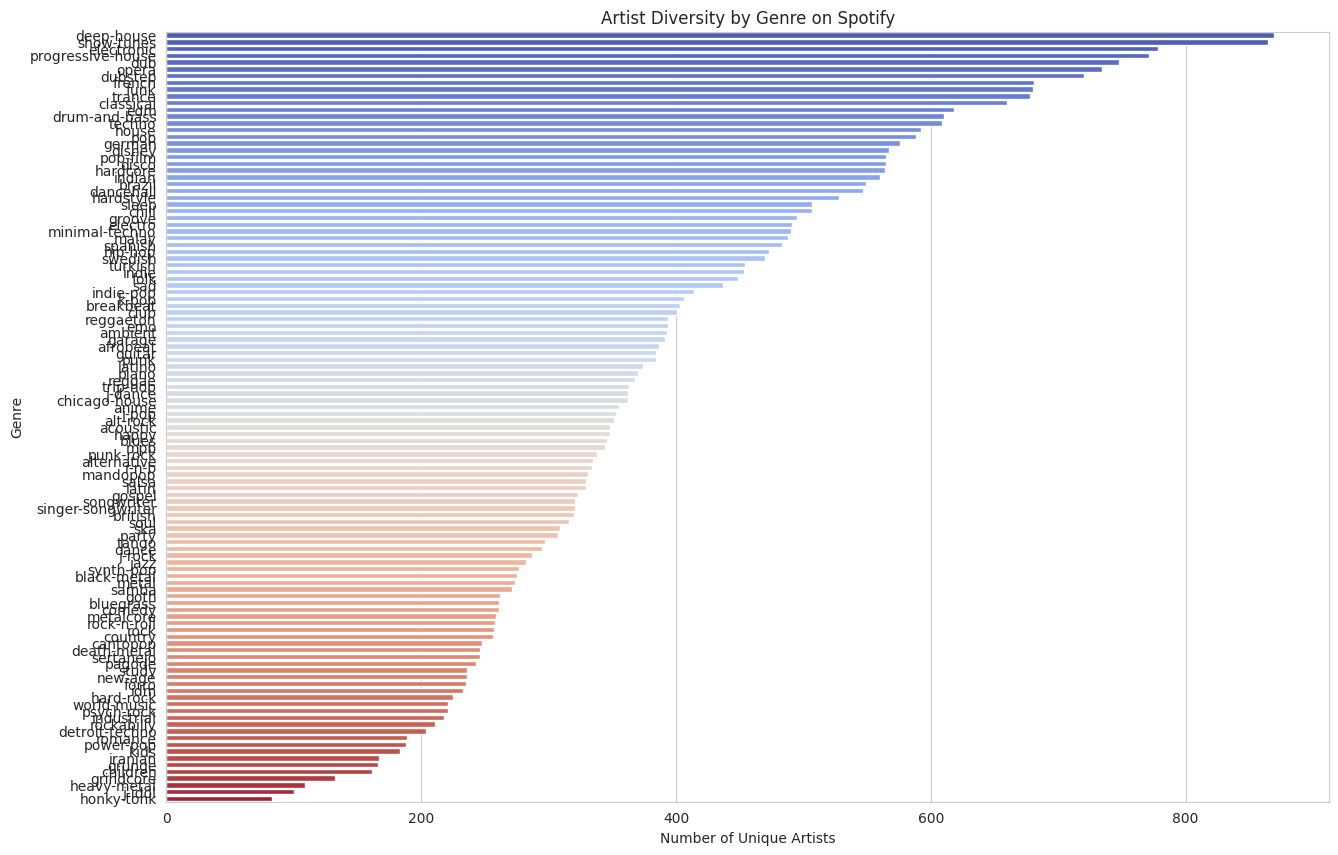

Top 5 Genres with the Highest Artist Diversity:
track_genre
deep-house           869
show-tunes           865
electronic           778
progressive-house    771
dub                  748
Name: artists_list, dtype: int64
Top 5 Genres with the Lowest Artist Diversity:
track_genre
children       161
grindcore      132
heavy-metal    109
j-idol         100
honky-tonk      83
Name: artists_list, dtype: int64


In [31]:
# To analyze artist diversity within genres, we'll compute a diversity score based on the number of unique artists
# contributing to each genre. A higher number of unique artists within a genre indicates higher diversity.
# Split the 'artists' column as it may contain multiple artists for a single track and then explode it
# This assumes the artists are separated by a semicolon ';'
spotify_data['artists_list'] = spotify_data['artists'].str.split(';')
spotify_data_exploded = spotify_data.explode('artists_list')

# Calculate the number of unique artists for each genre
artist_diversity = spotify_data_exploded.groupby('track_genre')['artists_list'].nunique()

# Sort the genres by artist diversity
artist_diversity_sorted = artist_diversity.sort_values(ascending=False)

# Plot the artist diversity for each genre
plt.figure(figsize=(15, 10))
sns.barplot(x=artist_diversity_sorted.values, y=artist_diversity_sorted.index, palette='coolwarm')
plt.title('Artist Diversity by Genre on Spotify')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Genre')
plt.show()

# Display the top 5 genres with the highest artist diversity
print("Top 5 Genres with the Highest Artist Diversity:")
print(artist_diversity_sorted.head(5))

# Display the top 5 genres with the lowest artist diversity
print("Top 5 Genres with the Lowest Artist Diversity:")
print(artist_diversity_sorted.tail(5))



#### Artist Diversity Analysis

This section investigates artist diversity across different genres on Spotify to determine which genres exhibit the highest diversity in artists and which are dominated by a smaller number of artists.

- **Methodology**: We began by preparing the data, splitting the 'artists' column into individual artists as some tracks feature collaborations. Then we grouped the data by genre and counted the number of unique artists contributing to each genre. This count serves as our diversity score.

- **Findings**: A bar plot of artist diversity scores across genres shows significant variation in the number of unique artists per genre. Some genres, such as 'deep-house' and 'show-tunes', have high diversity, indicating a large and varied artist base. In contrast, genres like 'honky-tonk' and 'j-idol' have far fewer contributing artists, suggesting they may be more niche or have a more concentrated artist community.

- **Implications**: Genres with higher diversity may benefit from a wider range of artistic influences and innovation, potentially leading to a richer listening experience. Conversely, genres with lower diversity might offer a more consistent and focused style, which might appeal to listeners with specific preferences.

- **Top 5 Genres with Highest Artist Diversity**:
  1. Deep-house
  2. Show-tunes
  3. Electronic
  4. Progressive-house
  5. Dub

- **Top 5 Genres with Lowest Artist Diversity**:
  1. Children
  2. Grindcore
  3. Heavy-metal
  4. J-idol
  5. Honky-tonk

These insights can be instrumental for music producers, artists, and Spotify playlist curators to understand the landscape of genre-specific artist communities and their relative sizes.


#RQ#6:Lyrical Analysis

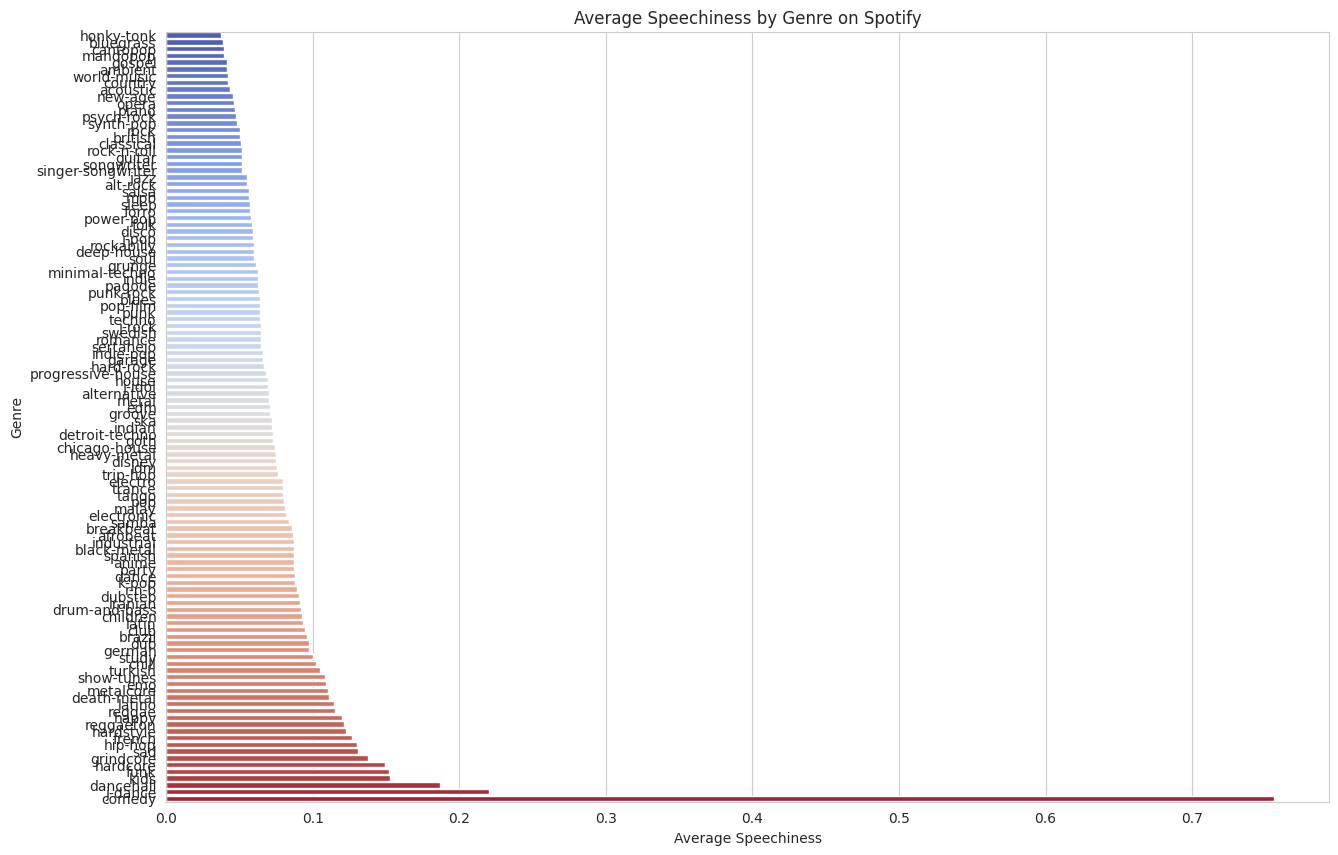

The correlation coefficient between speechiness and popularity is: -0.04


In [32]:
# To investigate the relationship between the speechiness of a track and its genre or popularity, we will perform the following steps:
# 1. Calculate the average speechiness for each genre.
# 2. Look at the correlation between speechiness and popularity.

# Calculate the mean speechiness for each genre
genre_speechiness = spotify_data.groupby('track_genre')['speechiness'].mean().sort_values()

# Plot the mean speechiness for each genre
plt.figure(figsize=(15, 10))
sns.barplot(x=genre_speechiness.values, y=genre_speechiness.index, palette='coolwarm')
plt.title('Average Speechiness by Genre on Spotify')
plt.xlabel('Average Speechiness')
plt.ylabel('Genre')
plt.show()

# Look at the correlation between speechiness and popularity
correlation_speechiness_popularity = spotify_data[['speechiness', 'popularity']].corr().iloc[0, 1]

# Display the correlation coefficient
print(f"The correlation coefficient between speechiness and popularity is: {correlation_speechiness_popularity:.2f}")



#### Lyrical Analysis: Speechiness Relationship

This analysis explores whether there is a relationship between the speechiness of a track and its genre or popularity. Speechiness is a measure of the presence of spoken words in a track.

- **Average Speechiness by Genre**: We calculated the average speechiness for each genre to determine if certain genres are more speech-centric. The bar plot reveals that genres vary in their average speechiness. Some genres, which might include rap or spoken word, exhibit higher levels of speechiness, while others, such as instrumental or classical genres, have lower levels.

- **Speechiness and Popularity Correlation**: We also examined the correlation between speechiness and track popularity. The correlation coefficient of -0.04 suggests a very weak inverse relationship; as speechiness increases, popularity tends to decrease slightly. However, this relationship is not strong enough to make definitive claims.

- **Insights**: The findings indicate that while speechiness does characterize certain genres, it does not significantly influence the popularity of a track on Spotify. This might suggest that factors other than the presence of spoken words play a more crucial role in determining a track's popularity.

The correlation coefficient and the visual representation together provide a comprehensive view of how speechiness interacts with genre and popularity, offering insights to artists and producers regarding the lyrical content of their music and its potential reception on Spotify.

This result could imply that listeners' preferences for track popularity are influenced by factors other than the amount of spoken content, such as melody, harmony, rhythm, or perhaps the reputation of the artist. It's also possible that the effect of speechiness on popularity may vary across different genres or cultural contexts, which this simple correlation does not capture(Due to data constraints). Further analysis could involve more complex statistical methods or data segmentation to explore these nuances.

#Final Take-aways and Conclusion

Genre Popularity: The analysis revealed that certain genres such as 'pop-film', 'k-pop', and 'chill' have higher average popularity scores, indicating that these genres are more popular among Spotify listeners. Conversely, genres like 'chicago-house', 'detroit-techno', and 'latin' are among the least popular. This suggests that genres with broader appeal and commercial success tend to have higher popularity ratings on Spotify.

Track Duration: There is considerable variability in the average duration of tracks across different genres. However, the length of a track does not significantly correlate with its popularity. This indicates that artists and producers have flexibility in track length without impacting the track's potential popularity.

Artist Diversity: The 'deep-house' and 'show-tunes' genres exhibit the highest diversity in artists, while genres such as 'honky-tonk' and 'j-idol' have lower diversity. High artist diversity within a genre can be indicative of a vibrant and dynamic creative environment, which may foster innovation and a wide array of musical styles.

Lyrical Analysis: The speechiness attribute, which measures the presence of spoken words in a track, does not show a strong correlation with popularity. This implies that the amount of spoken content is not a significant factor in a track's success on the platform.

*** Conclusions ***
The popularity of music on Spotify is not governed by a single attribute but is likely influenced by a combination of factors, including but not limited to genre, artist reputation, and current musical trends.

Genre-specific characteristics such as artist diversity and average track duration offer insights into the nature of the music and its creators, reflecting both the cultural context and the production styles prevalent within those genres.

The weak correlation between speechiness and popularity suggests that while lyrical content is an essential aspect of music, its presence does not necessarily equate to higher popularity. This could indicate that listeners may prioritize melody or composition over lyrical content, or that different listener groups may have varying preferences.

Overall, the data reflects a complex interplay between various musical attributes and listener preferences. Understanding these relationships can aid industry stakeholders in making data-driven decisions regarding music production, marketing, and distribution.

These insights and conclusions encapsulate the story that the data tells about the current landscape of music on Spotify. The findings can guide future research, inform the strategies of content creators, and enhance the experience of listeners on the platform.

**References and Additional Resources**
To ensure the integrity and depth of our analysis in this project, we utilized several key resources and references. Below is a list of these resources, which were instrumental in guiding our data analysis methodologies and providing the necessary tools and frameworks:

**Documentation and Libraries:**

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html): For data manipulation and analysis functions Pandas Documentation.

[NumPy Documentation](https://numpy.org/doc/stable/): For numerical operations on arrays and matrices NumPy Documentation.

[Matplotlib Documentation](https://matplotlib.org/stable/contents.html): For creating static, interactive, and animated visualizations in Python Matplotlib Documentation.

[Seaborn Documentation](https://seaborn.pydata.org/): For high-level interface for drawing attractive and informative statistical graphics Seaborn Documentation.

**Data Sources:**

[Spotify Web API](https://developer.spotify.com/documentation/web-api/): The Spotify Web API allows applications to access the Spotify music catalog and user data. While this project did not directly use the Web API, it is a useful reference for understanding the data features and potential extensions of the project Spotify for Developers.

[Spotify's GitHub](https://github.com/spotify): Spotify has a GitHub repository where they share datasets and tools which can be useful for similar projects Spotify GitHub.

**Educational Resources:**

[DataCamp](https://www.datacamp.com/): Online courses that cover data manipulation, visualization, and advanced analysis techniques DataCamp.

[Kaggle](https://www.kaggle.com/): A platform for predictive modeling and analytics competitions which also offers access to datasets and learning resources Kaggle.

**Forums and Communities:**

[Stack Overflow](https://stackoverflow.com/): A valuable resource for coding and troubleshooting during the data analysis process Stack Overflow.

[r/datascience](https://www.reddit.com/r/datascience/): A subreddit dedicated to data science where one can find discussions and resources Reddit Data Science.